## Step 1 : Import Libraries & Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tip.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Step 2 : Basic Information and Cleaning

In [4]:
df.info()
df.describe()

df.columns = df.columns.str.strip().str.lower()

df.dropna(inplace=True)

df['Total Bill'] = pd.to_numeric(df['total_bill'],errors = 'coerce')
df['tip'] = pd.to_numeric(df['tip'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Step 3 : Feature Engineering

In [6]:
# Add new columns
df['tip_pct'] = df['tip'] / df['total_bill'] * 100

# Group size categories
df['size_group'] = pd.cut(df['size'], bins=[0,1,2,4,10],
                          labels=['Solo','Pair','Small Group','Large Group'])

df.head()

,total_bill,tip,sex,smoker,day,time,size,Total Bill,tip_pct,size_group
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99,5.944673,Pair
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34,16.054159,Small Group
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01,16.658734,Small Group
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68,13.978041,Pair
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59,14.680765,Small Group


## Step 4 : Basic Statistics

In [8]:
print("Average Total Bill:", round(df['total_bill'].mean(),2))
print("Average Tip:", round(df['tip'].mean(),2))
print("Average Tip %:", round(df['tip_pct'].mean(),2))

Average Total Bill: 19.79
Average Tip: 3.0
Average Tip %: 16.08


## Step 5: Distributions of Total Bill and Tips

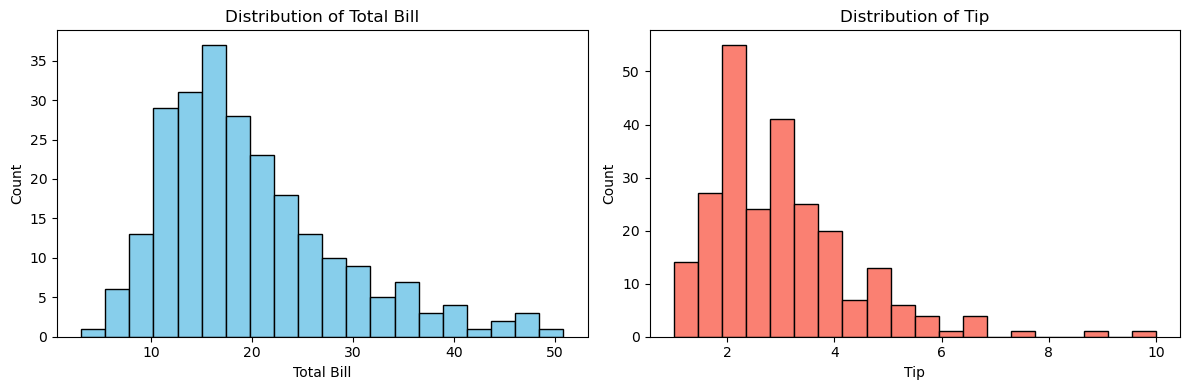

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(df['tip'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Tip')
plt.xlabel('Tip')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Step 6 : Relationship Between Tip and Total Bill

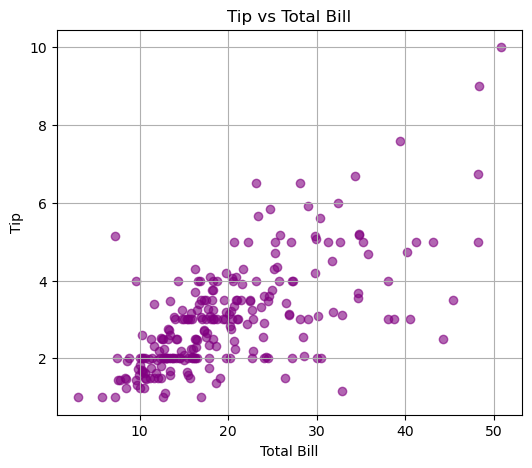

Correlation between Total Bill and Tip: 0.68


In [12]:
plt.figure(figsize=(6,5))
plt.scatter(df['total_bill'], df['tip'], color='purple', alpha=0.6)
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

corr = df['total_bill'].corr(df['tip'])
print("Correlation between Total Bill and Tip:", round(corr,2))


## Step 7: Do Men or Women Tip More?

sex
Female    16.649074
Male      15.765055
Name: tip_pct, dtype: float64


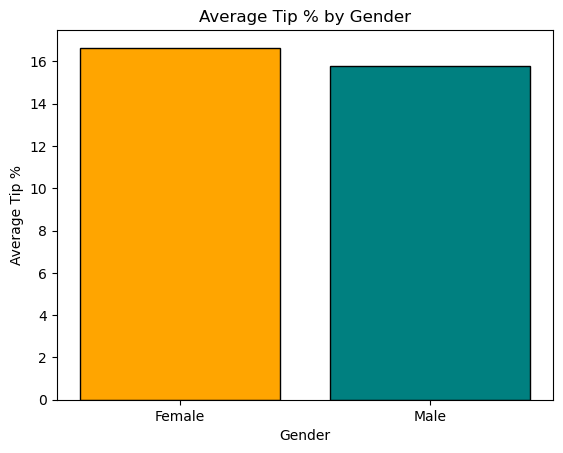

In [14]:
avg_tip_gender = df.groupby('sex')['tip_pct'].mean()
print(avg_tip_gender)

plt.bar(avg_tip_gender.index, avg_tip_gender.values, color=['orange','teal'], edgecolor='black')
plt.title('Average Tip % by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip %')
plt.show()


## Step 8 : Do Smokers Tip Differently?

smoker
No     15.932846
Yes    16.319604
Name: tip_pct, dtype: float64


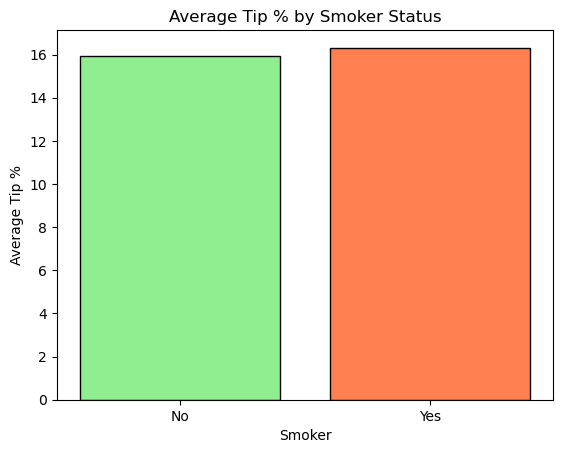

In [16]:
avg_tip_smoker = df.groupby('smoker')['tip_pct'].mean()
print(avg_tip_smoker)

plt.bar(avg_tip_smoker.index, avg_tip_smoker.values, color=['lightgreen','coral'], edgecolor='black')
plt.title('Average Tip % by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Average Tip %')
plt.show()


## Step 9. Which Day Gets Higher Tips?

day
Fri     16.991303
Sun     16.689729
Thur    16.127563
Sat     15.315172
Name: tip_pct, dtype: float64


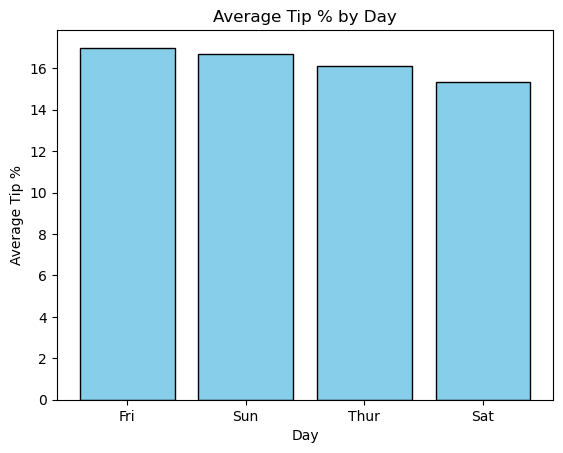

In [18]:
avg_tip_day = df.groupby('day')['tip_pct'].mean().sort_values(ascending=False)
print(avg_tip_day)

plt.bar(avg_tip_day.index, avg_tip_day.values, color='skyblue', edgecolor='black')
plt.title('Average Tip % by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip %')
plt.show()


## Step 10. Lunch vs Dinner – Who Tips Better?

time
Dinner    15.951779
Lunch     16.412793
Name: tip_pct, dtype: float64


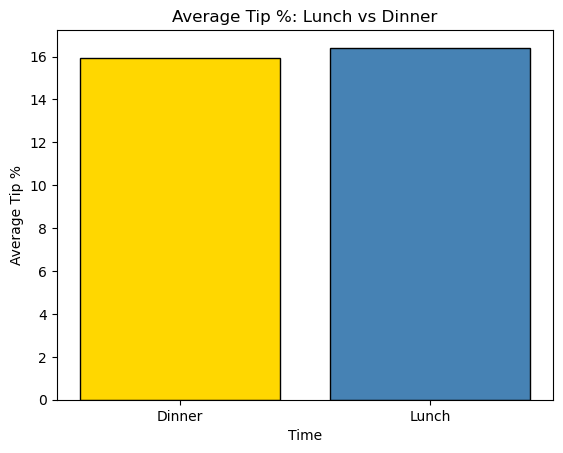

In [20]:
avg_tip_time = df.groupby('time')['tip_pct'].mean()
print(avg_tip_time)

plt.bar(avg_tip_time.index, avg_tip_time.values, color=['gold','steelblue'], edgecolor='black')
plt.title('Average Tip %: Lunch vs Dinner')
plt.xlabel('Time')
plt.ylabel('Average Tip %')
plt.show()


## Step 11. Does Group Size Affect Tipping Percentage?

size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: tip_pct, dtype: float64


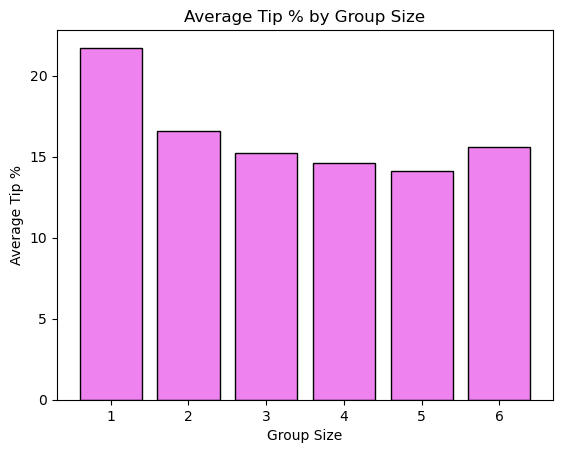

In [22]:
avg_tip_size = df.groupby('size')['tip_pct'].mean()
print(avg_tip_size)

plt.bar(avg_tip_size.index, avg_tip_size.values, color='violet', edgecolor='black')
plt.title('Average Tip % by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Tip %')
plt.show()
